In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
!pip install pandas

In [50]:
import pandas as pd

In [51]:
#Import the Fashion MNIST dataset
train_data = pd.read_csv(r'C:\Users\THABONTSIKI\Documents\school\documents from PC\Y4S2\AI\901010064\ai ass\fashion-mnist_train.csv')
test_data = pd.read_csv(r'C:\Users\THABONTSIKI\Documents\school\documents from PC\Y4S2\AI\901010064\ai ass\fashion-mnist_test.csv')
num_train_examples = len(train_data)
num_test_examples = len(test_data)

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [52]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
train_data.shape

(60000, 785)

In [55]:
test_data.shape

(10000, 785)

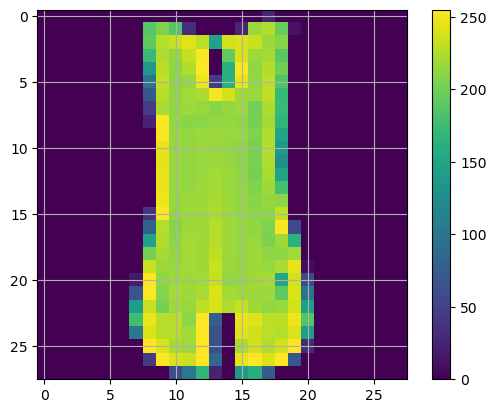

In [56]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(True)
plt.show()

In [57]:
train_images = train_images / 255.0

test_images = test_images / 255.0

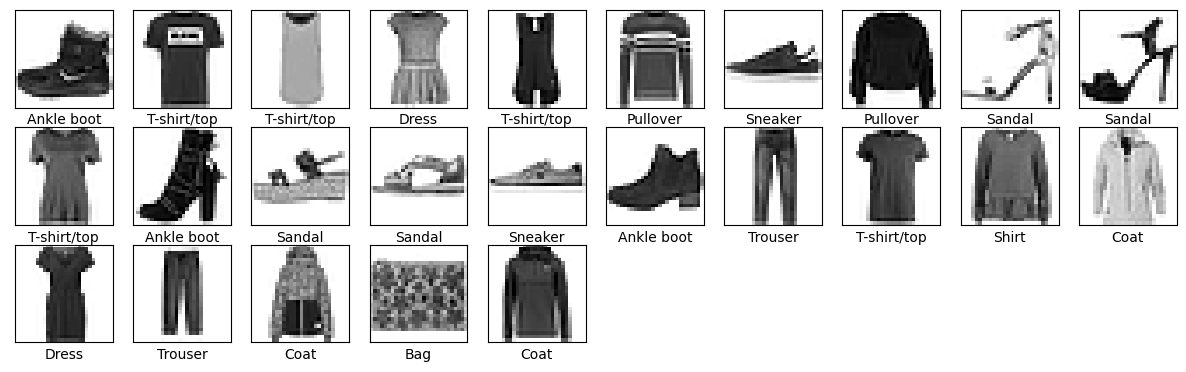

In [58]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax),
    tf.keras.layers.Dense(10)
])


In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [97]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1431 - accuracy: 0.9517
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1370 - accuracy: 0.9524
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9519
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1333 - accuracy: 0.9534
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1404 - accuracy: 0.9516
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1363 - accuracy: 0.9534
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1275 - accuracy: 0.9559
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9546
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1296 - accuracy: 0.9541
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.130

In [98]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4441 - accuracy: 0.8899

Test accuracy: 0.8899000287055969


In [99]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [100]:
predictions = probability_model.predict(test_images)

In [101]:
predictions[0]

array([1.3903644e-06, 2.5749193e-07, 4.2652664e-07, 1.3284897e-07,
       2.7534429e-07, 1.9768435e-04, 3.0194042e-06, 1.8583419e-03,
       1.3202293e-15, 9.9793845e-01], dtype=float32)

In [102]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(True)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('yellow')
  thisplot[true_label].set_color('yellow')

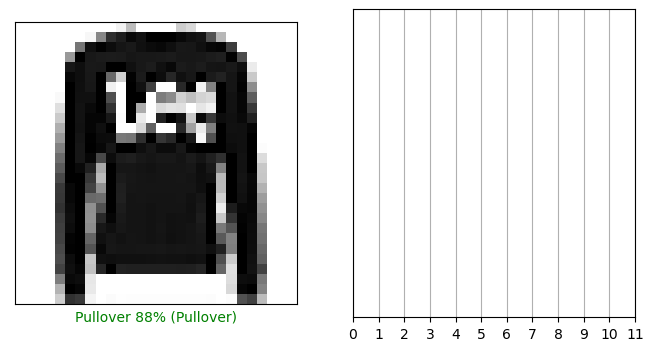

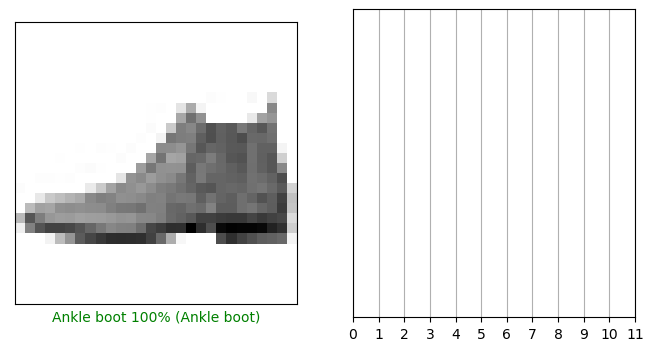

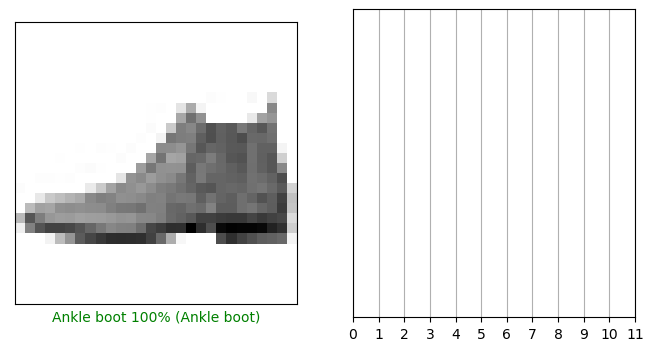

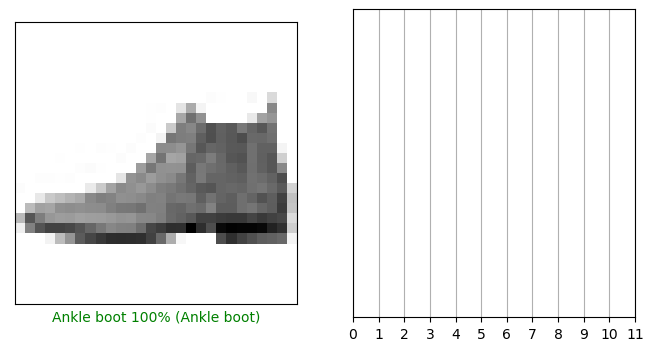

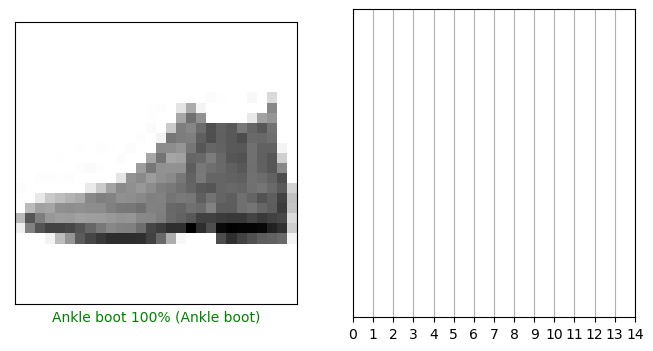

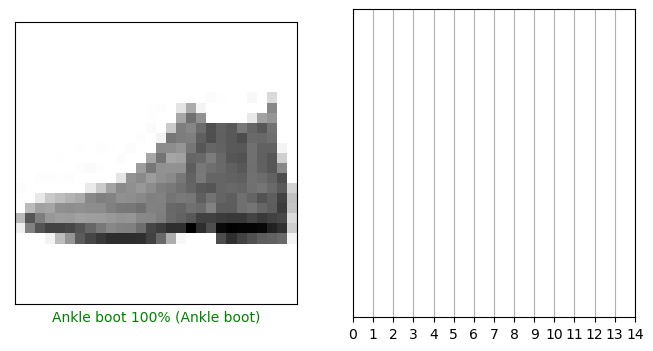

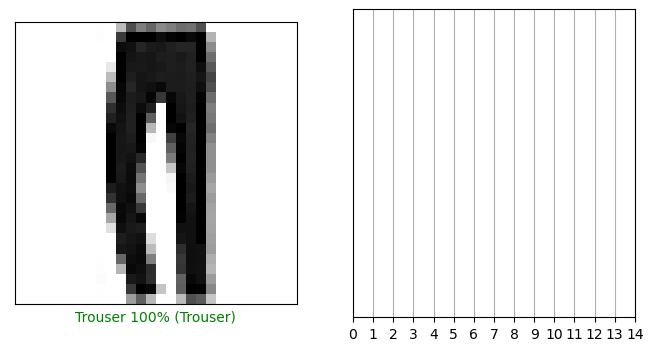

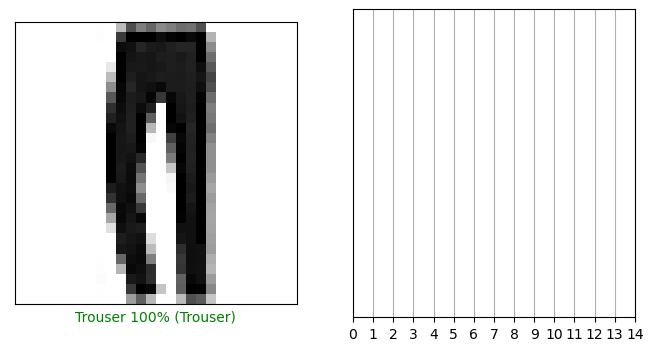

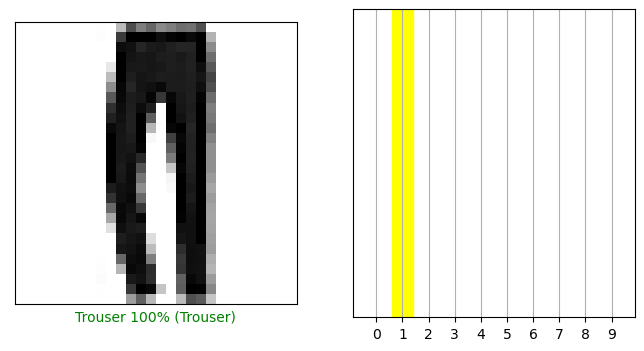

In [103]:
i = 2
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

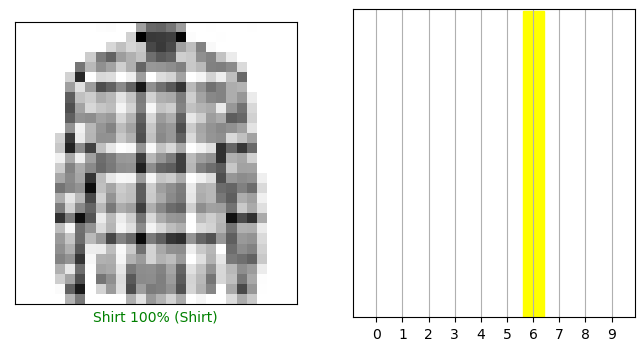

In [105]:
i = 7
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

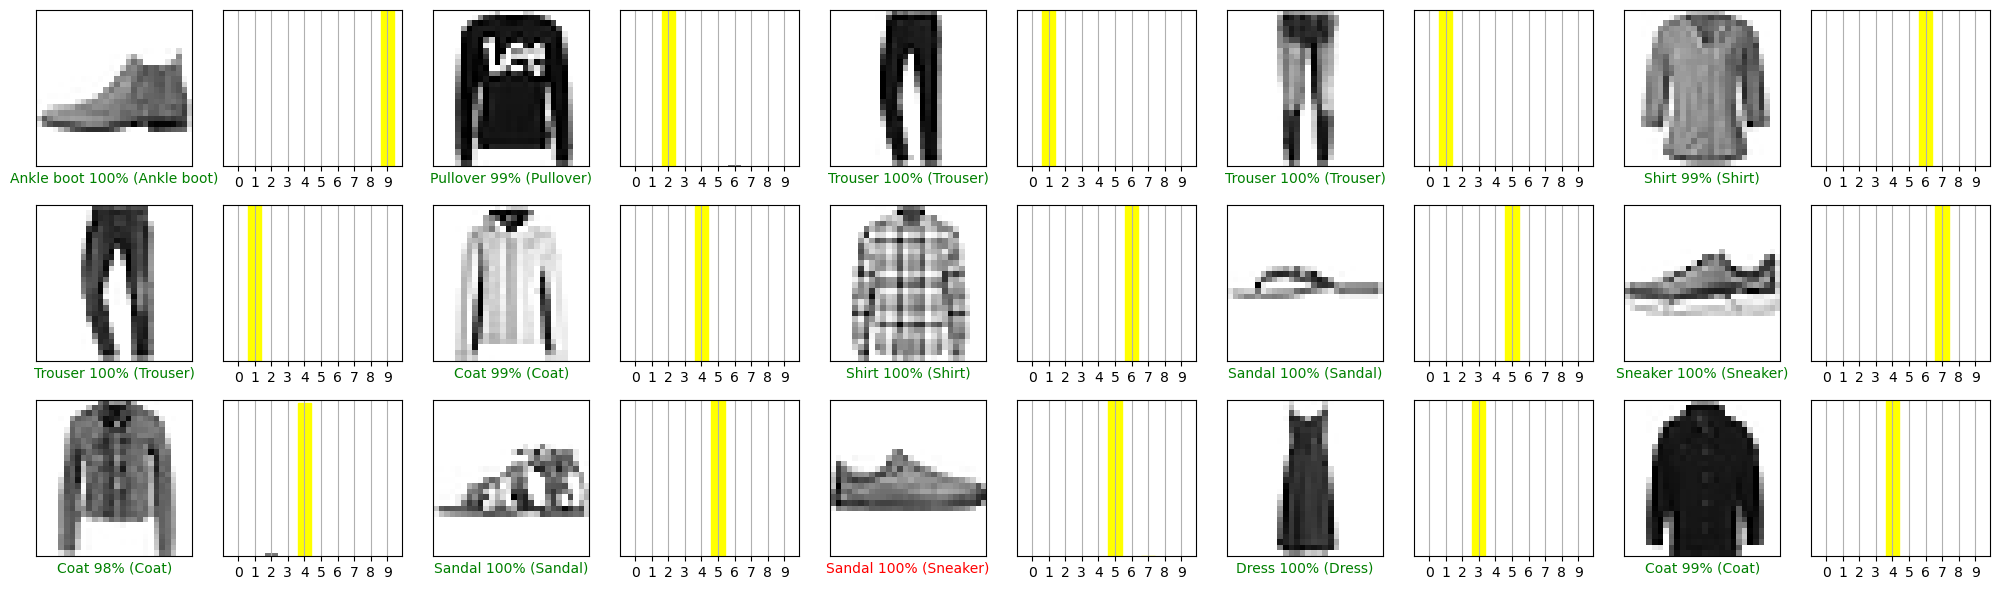

In [106]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in yellow and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

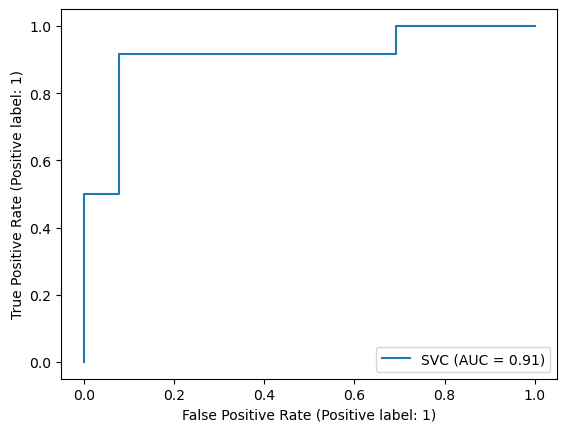

In [107]:
>>> import matplotlib.pyplot as plt  
>>> from sklearn import datasets, metrics, model_selection, svm
>>> X, y = datasets.make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = model_selection.train_test_split(
...     X, y, random_state=0)
>>> clf = svm.SVC(random_state=0)
>>> clf.fit(X_train, y_train)
svm.SVC(random_state=0)
>>> metrics.plot_roc_curve(clf, X_test, y_test)  
>>> plt.show() 

In [108]:
>>> import matplotlib.pyplot as plt  
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([0, 0, 1, 1])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
>>> display.plot()  
>>> plt.show()